# Digital Demodulation of RAW signal

All the notation & argument naming follows Blais review paper

$$
\begin{align}
\hat{V}_{I}(t) & = V_{\text{IF}}\Big[ \hat{X}_{f}(t)\cos(\omega_{\text{IF}}t)-\hat{P_{f}}(t)\sin(\omega_{\text{IF}}t)\Big] + \hat{V}_{\text{noise},t}(t) \\ \\
\hat{V}_{Q}(t) & = -V_{\text{IF}}\Big[ \hat{P}_{f}(t)\cos(\omega_{\text{IF}}t)+\hat{X_{f}}(t)\sin(\omega_{\text{IF}}t)\Big] + \hat{V}_{\text{noise},t}(t)

\end{align}
$$

$$
\begin{equation}
\hat{X}_f = \frac{\hat{a}^\dagger_f + \hat{a}_f}{2}, 
\quad 
\hat{P}_f = \frac{i(\hat{a}^\dagger_f - \hat{a}_f)}{2},
\end{equation}
$$

$$
\begin{bmatrix}
X_{f}(t) \\
P_{f}(t)
\end{bmatrix}
= R^{-1}(t)
\begin{bmatrix}
V_{I}(t) \\
V_{Q}(t)
\end{bmatrix} 

$$

In [3]:
import numpy as np
from pprint import pprint


from laboneq.contrib.example_helpers.generate_descriptor import generate_descriptor
#from laboneq.contrib.example_helpers.generate_device_setup import generate_device_setup
from laboneq.dsl.device import DeviceSetup


# descriptor = generate_descriptor(
#     #pqsc=[""], # 장비 여러개 사용시
#     shfqc_6=["DEV12256"],
#     number_data_qubits=1,
#     multiplex=True,
#     number_multiplex=1,
#     include_cr_lines=True,
#     include_ef_lines=True,
#     get_zsync=False,  # Only set to True when using real device
#     save = False,
#     filename="KAIST",
#     ip_address="192.168.0.83"
# )


# #descriptor
# setup = DeviceSetup.from_descriptor(yaml_text=descriptor, server_host="192.168.0.83")
# #setup
# setup.instruments[0].device_options = 'SHFQC/PLUS/QC6CH'
# #setup.instruments




# changed to KRISS setting 0911
descriptor = generate_descriptor(
    #pqsc=[""], # 장비 여러개 사용시
    shfqc_6=["DEV12576"],
    number_data_qubits=5,
    multiplex=True,
    number_multiplex=5,
    include_cr_lines=True,
    include_ef_lines=True,
    get_zsync=False,  # Only set to True when using real device
    save = True,
    filename="BF7_KRISS",
    ip_address="10.172.11.217"
)


#descriptor
setup = DeviceSetup.from_descriptor(yaml_text=descriptor, server_host="10.172.11.217")
#setup
setup.instruments[0].device_options = 'SHFQC/PLUS/QC6CH'
#setup.instruments

In [5]:
from qpu_types import TransmonQubit, TransmonQubitParameters
from helper import load_qubit_parameters, save_qubit_parameters
from operations import TransmonOperations
from laboneq.dsl.quantum.qpu import QPU, QuantumPlatform


#1 Create Initial QuantumElement
#qubits = TransmonQubit.from_device_setup(setup) # Also can be done with load_qubit_parameters 

#2 Load existing QuantumElement
_loaded_qubits = load_qubit_parameters(filename="20250911-2317_KRISS_q1718_cal") 
qubits = list(_loaded_qubits.values())


qpu = QPU(quantum_elements=qubits, quantum_operations=TransmonOperations())
#quantum_platform = QuantumPlatform(setup=setup, qpu=qpu)

# qpu.topology.add_edge("bus", "q16", "q17")
# qpu.topology.add_edge("bus", "q17", "q18")
# qpu.topology.add_edge("bus", "q18", "q19")
# qpu.topology.plot()


from laboneq.simple import workflow
folder_store = workflow.logbook.FolderStore("./experiment_store") 
folder_store.activate()
#folder_store.deactivate()
#workflow.logbook.LoggingStore().activate()
#workflow.logbook.LogbookStore().deactivate()


In [6]:
from laboneq.simple import Session
session = Session(setup)
session.connect(ignore_version_mismatch=True, do_emulation=False)
#session.disconnect()

[2025.09.11 23:19:24.533] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is /home/kriss/JSAHN/qubit-experiment/examples/laboneq_output/log
[2025.09.11 23:19:24.535] INFO    VERSION: laboneq 2.58.0
[2025.09.11 23:19:24.536] INFO    Connecting to data server at 10.172.11.217:8004
[2025.09.11 23:19:24.543] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at 10.172.11.217:8004
[2025.09.11 23:19:24.564] INFO    Configuring the device setup
[2025.09.11 23:19:24.573] INFO    The device setup is configured


# IQ Traj

To plot trajectory 

AcquisitionType has to be RAW and AveragingMode has to be cyclic


In [36]:
from experiments import iq_traj
#######################################################################
q = qubits[2]
q.parameters.readout_integration_delay =0
print(f"DRIVE range (dBm) : {q.parameters.drive_range}, READOUT range (dBm) : {q.parameters.readout_range_out}")
#######################################################################
options = iq_traj.experiment_workflow.options()
options.count(1024*4)
options.do_analysis(False)

#print(workflow.show_fields(options))

###################################################################
iq = iq_traj.experiment_workflow(
    session=session,
    qpu=qpu,
    qubits=q,
    options=options,
    states='ge'
)

iq_result = iq.run()
#qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
#print(iq_result.tasks['analysis_workflow'].output)

DRIVE range (dBm) : -5, READOUT range (dBm) : -25
[2025.09.11 23:26:19.785] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.09.11 23:26:19.786] INFO      Workflow 'iq_traj': execution started at 2025-09-11 14:26:19.785373Z          
[2025.09.11 23:26:19.786] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.09.11 23:26:19.794] INFO    Task 'temporary_qpu': started at 2025-09-11 14:26:19.794060Z
[2025.09.11 23:26:19.795] INFO    Task 'temporary_qpu': ended at 2025-09-11 14:26:19.794918Z
[2025.09.11 23:26:19.797] INFO    Task 'temporary_quantum_elements_from_qpu': started at 2025-09-11 
[2025.09.11 23:26:19.797] INFO    14:26:19.797087Z
[2025.09.11 23:26:19.798] INFO    Task 'temporary_quantum_elements_from_qpu': ended at 2025-09-11 14:26:19.797873Z
[2025.09.11 23:26:19.799] INFO    Task 'create_experiment': started at 2025-09-11 14:26:19.798959Z
[2025.09.11 23:26:19.804] INFO    Task 'create_expe

In [37]:
from laboneq.simple import show_pulse_sheet
from laboneq.contrib.example_helpers.plotting.plot_helpers import plot_simulation

show_pulse_sheet(compiled_experiment=iq_result.tasks["compile_experiment"].output,name='test', interactive=True, max_events_to_publish=10000)
#plot_simulation(compiled_experiment=rip_result.tasks["compile_experiment"].output)

[2025.09.11 23:26:22.720] INFO    Recompiling the experiment due to missing extra information in the compiled experiment. Compile with `OUTPUT_EXTRAS=True` and `MAX_EVENTS_TO_PUBLISH=10000` to bypass this step with a small impact on the compilation time.
[2025.09.11 23:26:22.721] INFO    Resolved modulation type of oscillator 'q2_readout_acquire_osc' on signal '/logical_signal_groups/q2/acquire' to SOFTWARE
[2025.09.11 23:26:22.721] INFO    Resolved modulation type of oscillator 'q2_drive_ge_osc' on signal '/logical_signal_groups/q2/drive' to HARDWARE
[2025.09.11 23:26:22.722] INFO    Starting LabOne Q Compiler run...
[2025.09.11 23:26:22.738] INFO    Schedule completed. [0.015 s]
[2025.09.11 23:26:22.740] INFO    Code generation completed for all AWGs. [0.002 s]
[2025.09.11 23:26:22.740] INFO    Completed compilation step 1 of 1. [0.017 s]
[2025.09.11 23:26:22.742] INFO    Finished LabOne Q Compiler run.


- For $2\mu s$ acquire we have  2000ns/0.5ns=4000 sample

In [38]:
from pprint import pprint
pprint(qubits[0].readout_integration_parameters())
pprint(qubits[0].readout_parameters())

qubits[0].parameters.readout_integration_delay

('acquire',
 {'discrimination_thresholds': None,
  'kernels': None,
  'kernels_type': 'default',
  'length': 2e-06})
('measure',
 {'amplitude': 1.0,
  'length': 2e-06,
  'pulse': {'function': 'GaussianSquare',
            'risefall_sigma_ratio': 3.0,
            'sigma': 0.2}})


2e-08

In [39]:
iq_result.output.data['q2']

AttributeWrapper(
│   cal_trace=AttributeWrapper(
│   │   e=AcquiredResult(
│   │   │   handle='q2/cal_trace/e',
│   │   │   axis_name=[
│   │   │   │   'samples'
│   │   │   ],
│   │   │   axis=[
│   │   │   │   array([0.000e+00, 1.000e+00, 2.000e+00, ..., 3.997e+03, 3.998e+03,
│      3.999e+03], shape=(4000,))
│   │   │   ],
│   │   │   data=array([ 4.37928744e-04-0.00026426j,  6.88544996e-04-0.00037192j,
│      -8.90167469e-05-0.00038219j, ...,  4.13107007e-04-0.00124382j,
│      -2.77936821e-04-0.00055552j,  2.75454648e-04+0.00017359j],
│     shape=(4000,)),
│   │   │   last_nt_step=[]
│   │   ),
│   │   g=AcquiredResult(
│   │   │   handle='q2/cal_trace/g',
│   │   │   axis_name=[
│   │   │   │   'samples'
│   │   │   ],
│   │   │   axis=[
│   │   │   │   array([0.000e+00, 1.000e+00, 2.000e+00, ..., 3.997e+03, 3.998e+03,
│      3.999e+03], shape=(4000,))
│   │   │   ],
│   │   │   data=array([-5.00599466e-05-6.26124157e-05j,  4.62900411e-04+3.53118365e-04j,
│   │   1.30605651e-04-

In [40]:
e_raw = iq_result.output.data['q2']['cal_trace']['e'].data
I_e = e_raw.real
Q_e = e_raw.imag

g_raw = iq_result.output.data['q2']['cal_trace']['g'].data
axis = iq_result.output.data['q2']['cal_trace']['g'].axis[0]
I_g = g_raw.real
Q_g = g_raw.imag

# Helper function for RAW data processing
Helper function should be designed 

Processing starts with raw complex data  (I_component, Q_component) 

1. separate I, Q signal

2. demoulate signal with IF frequency, IF_freq = target_freq - LO_freq  
    ex) IF = Transmon.drive_frequency_ge





In [41]:
def IF_demodulation(I_data, Q_data, IF_freq):

    I_data = np.array(I_data)
    Q_data = np.array(Q_data)

    coswt = np.cos(2 * np.pi * IF_freq * np.arange(len(I_data))/2 * 1e-9) # reason of 2 ; 2GHz sampling rate
    sinwt = np.sin(2 * np.pi * IF_freq * np.arange(len(Q_data))/2 * 1e-9) 

    # demodulate the data
    I_demod = I_data * coswt + Q_data * sinwt
    Q_demod = -I_data * sinwt + Q_data * coswt

    return I_demod, Q_demod

In [52]:
readout_IF_freq = qubits[2].parameters.readout_frequency #+ 1e6
print(readout_IF_freq)

-77443000.0


In [43]:
X_g, P_g = IF_demodulation(I_g, Q_g, readout_IF_freq)
X_e, P_e = IF_demodulation(I_e, Q_e, readout_IF_freq)

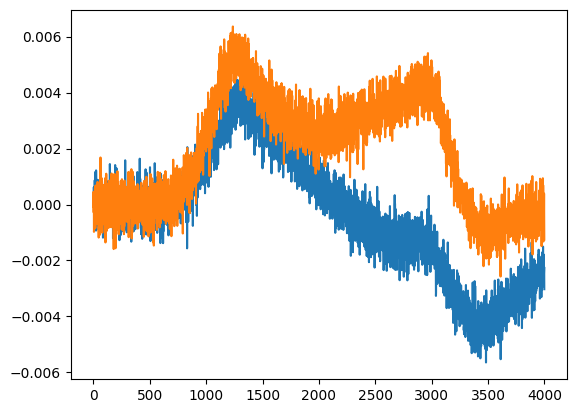

In [44]:
import matplotlib.pyplot as plt
plt.plot(X_g)
plt.plot(P_g)
#plt.plot(X_g,P_g)

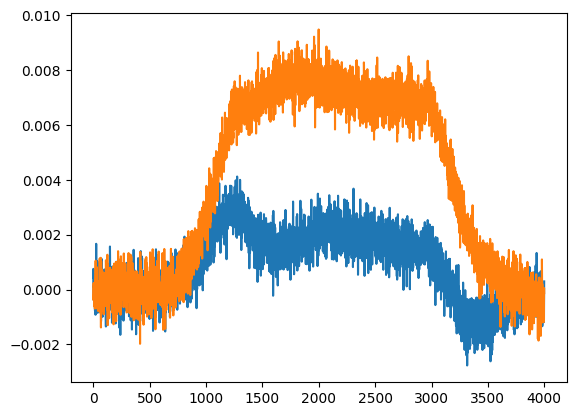

In [45]:
plt.plot(X_e)
plt.plot(P_e)

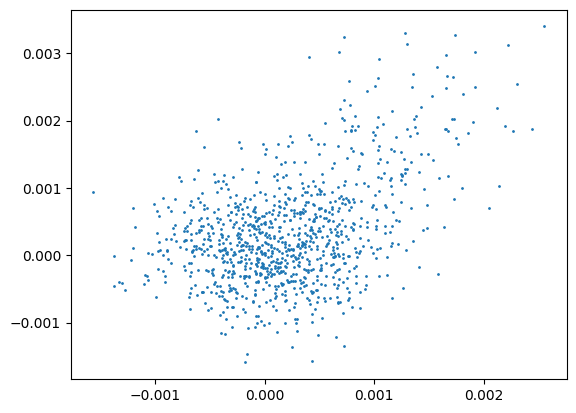

In [54]:
plt.scatter(X_g[:1000], P_g[:1000], s=1)

In [51]:
qubits[2].calibration()

Calibration(
│   calibration_items={
│   │   '/logical_signal_groups/q2/drive': SignalCalibration(
│   │   │   amplitude=None,
│   │   │   delay_signal=None,
│   │   │   local_oscillator=Oscillator(
│   │   │   │   uid='q2_drive_local_osc',
│   │   │   │   frequency=4800000000.0,
│   │   │   │   modulation_type=ModulationType.AUTO,
│   │   │   │   carrier_type=None
│   │   │   ),
│   │   │   voltage_offset=None,
│   │   │   mixer_calibration=None,
│   │   │   precompensation=None,
│   │   │   oscillator=Oscillator(
│   │   │   │   uid='q2_drive_ge_osc',
│   │   │   │   frequency=-83904718.8281784,
│   │   │   │   modulation_type=ModulationType.AUTO,
│   │   │   │   carrier_type=None
│   │   │   ),
│   │   │   port_delay=None,
│   │   │   port_mode=None,
│   │   │   range=-5,
│   │   │   threshold=None,
│   │   │   amplifier_pump=None,
│   │   │   added_outputs=None,
│   │   │   automute=False
│   │   ),
│   │   '/logical_signal_groups/q2/drive_ef': SignalCalibration(
│   │   │   amplit

# Future Works on IQ related module

- iq_traj module should be integrated with iq_blobs

IQ blobs features
- double gaussian fitting for an thermal photon analysis
- confusion matrix 
- discrimination error
